In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ex1data1.txt", header=None)
X = df.iloc[:, 0:1].values
y = df.iloc[:, -1].values

In [3]:
X

array([[ 6.1101],
       [ 5.5277],
       [ 8.5186],
       [ 7.0032],
       [ 5.8598],
       [ 8.3829],
       [ 7.4764],
       [ 8.5781],
       [ 6.4862],
       [ 5.0546],
       [ 5.7107],
       [14.164 ],
       [ 5.734 ],
       [ 8.4084],
       [ 5.6407],
       [ 5.3794],
       [ 6.3654],
       [ 5.1301],
       [ 6.4296],
       [ 7.0708],
       [ 6.1891],
       [20.27  ],
       [ 5.4901],
       [ 6.3261],
       [ 5.5649],
       [18.945 ],
       [12.828 ],
       [10.957 ],
       [13.176 ],
       [22.203 ],
       [ 5.2524],
       [ 6.5894],
       [ 9.2482],
       [ 5.8918],
       [ 8.2111],
       [ 7.9334],
       [ 8.0959],
       [ 5.6063],
       [12.836 ],
       [ 6.3534],
       [ 5.4069],
       [ 6.8825],
       [11.708 ],
       [ 5.7737],
       [ 7.8247],
       [ 7.0931],
       [ 5.0702],
       [ 5.8014],
       [11.7   ],
       [ 5.5416],
       [ 7.5402],
       [ 5.3077],
       [ 7.4239],
       [ 7.6031],
       [ 6.3328],
       [ 6

In [4]:
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

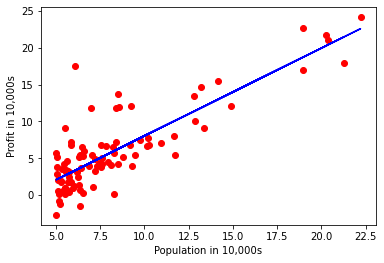

In [9]:
plt.scatter(X, y, color="red")
plt.plot(X, regressor.predict(X), color="blue")
plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.show()

In [141]:
theta = [[0] for _ in range(X.shape[1] + 1)]
theta = np.array(theta)
print(theta)

[[0]
 [0]]


In [140]:
def gradientDescent(X, y, theta, alpha, iter_count):
    y = np.matrix.transpose(np.array([y]))
    Jvals = []
    theta = theta.copy()
    for i in range(iter_count):
        predictions = np.dot(X, theta)
        deviation = predictions - y
        delta = np.dot(np.matrix.transpose(X), deviation) / len(X)
        theta = theta - alpha * delta
        Jvals.append([i, calculateCost(X, y, theta)])
    return theta, np.array(Jvals, dtype=float)

In [115]:
def calculateCost(X, y, theta):
    predictions = np.dot(X, theta)
    deviation = (predictions - y) ** 2
    J = sum(deviation) / (2 * len(X))
    return J

In [116]:
X_new = np.concatenate((np.ones([len(X), 1]), X), axis=1)

In [142]:
theta, Jvals = gradientDescent(X_new, y, theta, 0.01, 1500)

<ipython-input-140-3241c00d1a77>:11: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  return theta, np.array(Jvals, dtype=float)


In [143]:
theta

array([[-3.63029144],
       [ 1.16636235]])

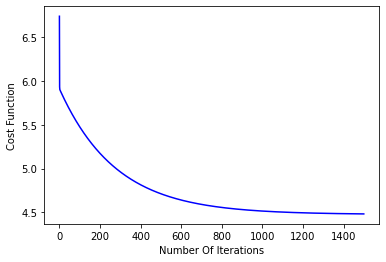

In [147]:
plt.plot(Jvals[:, 0], Jvals[:, 1], color="blue")
plt.xlabel("Number Of Iterations")
plt.ylabel("Cost Function")
plt.show()

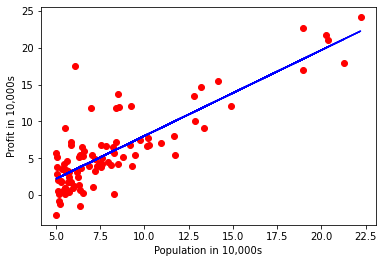

In [148]:
plt.scatter(X, y, color="red")
plt.plot(X, np.dot(X_new, theta), color="blue")
plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.show()

In [149]:
regressor.predict([[10]])

array([8.03455556])

In [151]:
np.dot([[1, 10]], theta)

array([[8.03333206]])